In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
# import pandas as pd
import patsy
from matplotlib.ticker import FuncFormatter

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
sns.set_style('whitegrid')
# pd.options.display.max_rows = 100

### Loading data

In [3]:
listings = pd.read_csv('./dataset/jobs_data-consol.csv')

In [4]:
listings.drop(['Unnamed: 0'], axis=1, inplace= True)

In [5]:
listings

,url,title,company,responsibilities,requirements,min_salary,max_salary,cat,label,med_salary,text
0,https://www.mycareersfuture.sg/job/2d8dd9bde21...,"Senior Manager, Data Scientist",SINGAPORE TELECOMMUNICATIONS LIMITED,Technology Group The Technology Group (TG) is ...,Requirements Master’s degree or PhD in techni...,5500.0,11000.0,data_science,1,8250.000000,"Senior Manager, Data Scientist SINGAPORE TELEC..."
1,https://www.mycareersfuture.sg/job/9251f72bf1e...,Data Scientist,SINGAPORE TELECOMMUNICATIONS LIMITED,Responsibilities: Develop and enhance data i...,Requirements: Minimum B.S. degree in Compute...,4500.0,9000.0,data_science,1,6750.000000,Data Scientist SINGAPORE TELECOMMUNICATIONS LI...
2,https://www.mycareersfuture.sg/job/f5d8acc78b2...,Data Scientist,NIOMETRICS (PTE.) LTD.,Your profile & role on the project YOU: Thriv...,"You hold a Bachelor, Master or PhD degree in...",5000.0,10000.0,data_science,1,7500.000000,Data Scientist NIOMETRICS (PTE.) LTD. Your pro...
3,https://www.mycareersfuture.sg/job/557127dc1c2...,Data Scientist Junior,AXA DIL@ASIA PTE. LTD.,If you are an experienced and passionate Dat...,Job Summary: If you are an experienced and pas...,4600.0,5600.0,data_science,1,5100.000000,Data Scientist Junior AXA DIL@ASIA PTE. LTD. ...
4,https://www.mycareersfuture.sg/job/e83b986ed40...,Data Scientist,ACCENTURE PTE LTD,Singtel Group Consumer is seeking a Senior Dat...,Requirements: Minimum Masters degree and abov...,6000.0,12000.0,data_science,1,9000.000000,Data Scientist ACCENTURE PTE LTD Singtel Group...
5,https://www.mycareersfuture.sg/job/e709dc347fd...,Data Scientist,CREATIVE MEDIA WORKS PTE. LTD.,Involve in data-related product from the star...,"A degree (PhD) in a related field, preferably...",5000.0,10000.0,data_science,1,7500.000000,Data Scientist CREATIVE MEDIA WORKS PTE. LTD. ...
6,https://www.mycareersfuture.sg/job/ad1c9a12d61...,Research & Development - Data Scientist - Home...,PROCTER & GAMBLE INTERNATIONAL OPERATIONS SA S...,Job Summary The role focuses on data ingresio...,Education & Experience Requirements - Bachelo...,4800.0,10000.0,data_science,1,7400.000000,Research & Development - Data Scientist - Home...
7,https://www.mycareersfuture.sg/job/da65734a44e...,Data Scientist,DENTSU AEGIS NETWORK HUB2050,Love buying and selling on Carousell? Then mee...,Requirements: Proficient in data science lang...,8500.0,12500.0,data_science,1,10500.000000,Data Scientist DENTSU AEGIS NETWORK HUB2050 Lo...
8,https://www.mycareersfuture.sg/job/570779cbcc0...,Data Scientist,CROWDONOMIC MEDIA PTE. LTD.,Work with product and business teams to defin...,"PhD in computer science, statistics, or other...",3500.0,6500.0,data_science,1,5000.000000,Data Scientist CROWDONOMIC MEDIA PTE. LTD. Wo...
9,https://www.mycareersfuture.sg/job/64985b9639e...,Data Scientist,KNOREX PTE. LTD.,Work with customers to identify opportunities...,PhD/Masters/Bachelors (with good honours) in ...,3500.0,6000.0,data_science,1,4750.000000,Data Scientist KNOREX PTE. LTD. Work with cus...


In [6]:
listings.columns

Index([u'url', u'title', u'company', u'responsibilities', u'requirements',
       u'min_salary', u'max_salary', u'cat', u'label', u'med_salary', u'text'],
      dtype='object')

In [7]:
listings

,url,title,company,responsibilities,requirements,min_salary,max_salary,cat,label,med_salary,text
0,https://www.mycareersfuture.sg/job/2d8dd9bde21...,"Senior Manager, Data Scientist",SINGAPORE TELECOMMUNICATIONS LIMITED,Technology Group The Technology Group (TG) is ...,Requirements Master’s degree or PhD in techni...,5500.0,11000.0,data_science,1,8250.000000,"Senior Manager, Data Scientist SINGAPORE TELEC..."
1,https://www.mycareersfuture.sg/job/9251f72bf1e...,Data Scientist,SINGAPORE TELECOMMUNICATIONS LIMITED,Responsibilities: Develop and enhance data i...,Requirements: Minimum B.S. degree in Compute...,4500.0,9000.0,data_science,1,6750.000000,Data Scientist SINGAPORE TELECOMMUNICATIONS LI...
2,https://www.mycareersfuture.sg/job/f5d8acc78b2...,Data Scientist,NIOMETRICS (PTE.) LTD.,Your profile & role on the project YOU: Thriv...,"You hold a Bachelor, Master or PhD degree in...",5000.0,10000.0,data_science,1,7500.000000,Data Scientist NIOMETRICS (PTE.) LTD. Your pro...
3,https://www.mycareersfuture.sg/job/557127dc1c2...,Data Scientist Junior,AXA DIL@ASIA PTE. LTD.,If you are an experienced and passionate Dat...,Job Summary: If you are an experienced and pas...,4600.0,5600.0,data_science,1,5100.000000,Data Scientist Junior AXA DIL@ASIA PTE. LTD. ...
4,https://www.mycareersfuture.sg/job/e83b986ed40...,Data Scientist,ACCENTURE PTE LTD,Singtel Group Consumer is seeking a Senior Dat...,Requirements: Minimum Masters degree and abov...,6000.0,12000.0,data_science,1,9000.000000,Data Scientist ACCENTURE PTE LTD Singtel Group...
5,https://www.mycareersfuture.sg/job/e709dc347fd...,Data Scientist,CREATIVE MEDIA WORKS PTE. LTD.,Involve in data-related product from the star...,"A degree (PhD) in a related field, preferably...",5000.0,10000.0,data_science,1,7500.000000,Data Scientist CREATIVE MEDIA WORKS PTE. LTD. ...
6,https://www.mycareersfuture.sg/job/ad1c9a12d61...,Research & Development - Data Scientist - Home...,PROCTER & GAMBLE INTERNATIONAL OPERATIONS SA S...,Job Summary The role focuses on data ingresio...,Education & Experience Requirements - Bachelo...,4800.0,10000.0,data_science,1,7400.000000,Research & Development - Data Scientist - Home...
7,https://www.mycareersfuture.sg/job/da65734a44e...,Data Scientist,DENTSU AEGIS NETWORK HUB2050,Love buying and selling on Carousell? Then mee...,Requirements: Proficient in data science lang...,8500.0,12500.0,data_science,1,10500.000000,Data Scientist DENTSU AEGIS NETWORK HUB2050 Lo...
8,https://www.mycareersfuture.sg/job/570779cbcc0...,Data Scientist,CROWDONOMIC MEDIA PTE. LTD.,Work with product and business teams to defin...,"PhD in computer science, statistics, or other...",3500.0,6500.0,data_science,1,5000.000000,Data Scientist CROWDONOMIC MEDIA PTE. LTD. Wo...
9,https://www.mycareersfuture.sg/job/64985b9639e...,Data Scientist,KNOREX PTE. LTD.,Work with customers to identify opportunities...,PhD/Masters/Bachelors (with good honours) in ...,3500.0,6000.0,data_science,1,4750.000000,Data Scientist KNOREX PTE. LTD. Work with cus...


In [8]:
# listings.to_csv('job_listings.csv', sep=',')

In [9]:
print listings.info()
print '=========================================='
print listings.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 11 columns):
url                 1480 non-null object
title               1480 non-null object
company             1480 non-null object
responsibilities    1480 non-null object
requirements        1480 non-null object
min_salary          1480 non-null float64
max_salary          1480 non-null float64
cat                 1480 non-null object
label               1480 non-null int64
med_salary          1480 non-null float64
text                1480 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 127.3+ KB
None
(1480, 11)


### Plotting heatmap

In [10]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

#function to plot correlation graph
def corr_heatmap(data, method = "pearson"):
    #set the default matplotlib figure size:
    mean_corr = data.corr(method = method)
    
    #generate mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like( mean_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap with seaborn.
    #assign the matplotlib axis the function returns. This resizes the labels.
    fig, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(mean_corr, ax=ax,  square = True, mask=mask, linecolor='white', annot = True, cmap='PiYG', vmin=-1, vmax=1, fmt = '.2f')

    #resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    plt.show()

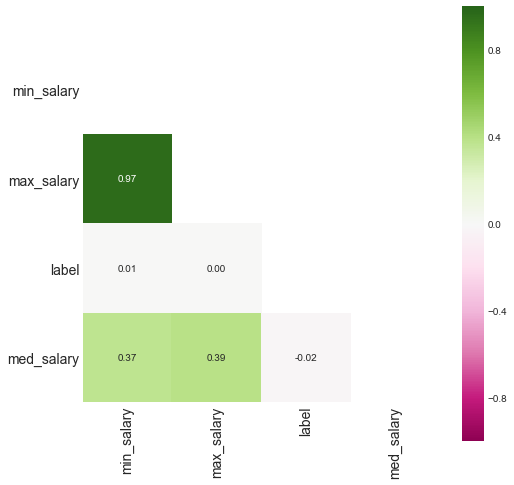

In [11]:
corr_heatmap(listings)

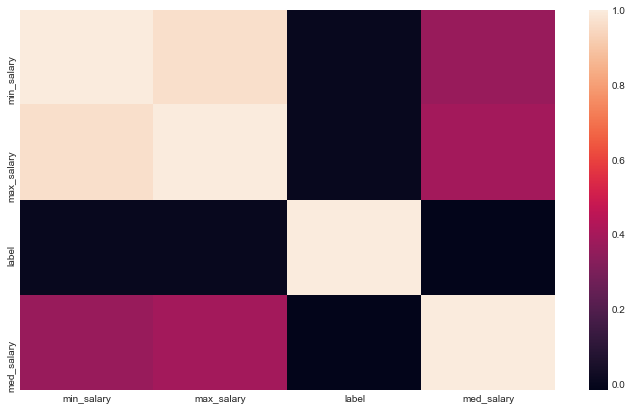

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(listings.corr())

### Salary Prediction

In [13]:
listings.cat.unique()

array(['data_science', 'other', 'machine learning',
       'Artificial Intelligence', 'Python', 'Big Data', 'Cloud Computing',
       'Web Development'], dtype=object)

In [14]:
listings.company.unique()

array(['SINGAPORE TELECOMMUNICATIONS LIMITED', 'NIOMETRICS (PTE.) LTD.',
       'AXA DIL@ASIA PTE. LTD.', 'ACCENTURE PTE LTD',
       'CREATIVE MEDIA WORKS PTE. LTD.',
       'PROCTER & GAMBLE INTERNATIONAL OPERATIONS SA SINGAPORE BRANCH',
       'DENTSU AEGIS NETWORK HUB2050', 'CROWDONOMIC MEDIA PTE. LTD.',
       'KNOREX PTE. LTD.', 'JOBSTREET.COM PTE LTD',
       'SCIENTE INTERNATIONAL PTE. LTD.', 'NSEARCH GLOBAL PTE. LTD.',
       'PALO IT SINGAPORE PTE. LTD.', 'PACIFIC REFRESHMENTS PTE. LTD.',
       'DATASPARK PTE. LTD.', 'WEGO PTE. LTD.', 'CAROUSELL PTE. LTD.',
       'SHOPEE SINGAPORE PRIVATE LIMITED', 'DBS BANK LTD.',
       'XTREMAX PTE. LTD.', 'KKT TECHNOLOGY PTE. LTD.',
       'HONESTBEE PTE. LTD.', 'GIC PRIVATE LIMITED',
       'DHL EXPRESS (SINGAPORE) PTE. LTD.', 'KANEX PTE. LTD.',
       'NCS PTE. LTD.', 'TRUSTY CARS PTE. LTD.',
       'VELOCITY ENTERPRISE PTE. LTD.', 'A*STAR RESEARCH ENTITIES',
       'INSTITUTE FOR INFOCOMM RESEARCH',
       'NATIONAL UNIVERSITY OF SIN

In [15]:
print len(listings['cat'].value_counts())
print len(listings['company'].value_counts())
print len(listings['label'].value_counts())

8
557
2


In [16]:
#what is the median salary? (calculate mean salary, too, for fun)
print("salary median: " + str(listings["med_salary"].median()))
print("salary mean: " + str(listings["med_salary"].mean()))
#creating new target variable "above_med_sal" where 0 == below or equal to the median, and 1 == above the median; any postings without salary information will have NaN values for this variable
listings["above_med_sal"] = np.nan
listings.ix[listings["med_salary"] > listings["med_salary"].median(), "above_med_sal"] = 1
listings.ix[listings["med_salary"] <= listings["med_salary"].median(), "above_med_sal"] = 0
listings.tail()

salary median: 6000.0
salary mean: 6590.7954955


,url,title,company,responsibilities,requirements,min_salary,max_salary,cat,label,med_salary,text,above_med_sal
1475,https://www.mycareersfuture.sg/job/d4e1dd0ca24...,"MD / ED, Head of CB Ops Tech, Grp Consumer B...",DBS BANK LTD.,About the Institute for Infocomm Research (I²R...,"PhD in Computer Science, Computer Engineering...",18000.0,36000.0,Big Data,0,27000.0,"MD / ED, Head of CB Ops Tech, Grp Consumer B...",1.0
1476,https://www.mycareersfuture.sg/job/95dd78da737...,"ED / SVP, Public Cloud Lead, IT Shared Servi...",DBS BANK LTD.,"Job Purpose DBS is a leading regional bank, e...","At least 10-15 years of work experience, incl...",15000.0,30000.0,other,0,22500.0,"ED / SVP, Public Cloud Lead, IT Shared Servi...",1.0
1477,https://www.mycareersfuture.sg/job/990bae0b7ec...,Chief Technology Officer,HAIER SINGAPORE INVESTMENT HOLDING PTE. LTD.,"Based in Singapore, you will be the Principal ...",The ideal candidate should possess: With at ...,15000.0,40000.0,other,0,27500.0,Chief Technology Officer HAIER SINGAPORE INVES...,1.0
1478,https://www.mycareersfuture.sg/job/5d2be3f0290...,"ED / SVP, Risk & Control, Middle Office Tech...",DBS BANK LTD.,Risk Management Oversee risk mitigation prog...,Degree holder in IT or Engineering Discipline...,15000.0,30000.0,other,0,22500.0,"ED / SVP, Risk & Control, Middle Office Tech...",1.0
1479,https://www.mycareersfuture.sg/job/710c77ba094...,"SVP / VP, Platform Architect, Group Consumer...",DBS BANK LTD.,Your Domain / Platform Specialization You w...,-,15000.0,30000.0,data_science,1,22500.0,"SVP / VP, Platform Architect, Group Consumer...",1.0


In [17]:
print len(listings['above_med_sal'].value_counts())

2


In [18]:
pd.value_counts(listings['above_med_sal'].values, sort=False)

1.0    687
0.0    793
dtype: int64

In [19]:
listings[listings['above_med_sal'] == 1.0]

,url,title,company,responsibilities,requirements,min_salary,max_salary,cat,label,med_salary,text,above_med_sal
0,https://www.mycareersfuture.sg/job/2d8dd9bde21...,"Senior Manager, Data Scientist",SINGAPORE TELECOMMUNICATIONS LIMITED,Technology Group The Technology Group (TG) is ...,Requirements Master’s degree or PhD in techni...,5500.0,11000.0,data_science,1,8250.000000,"Senior Manager, Data Scientist SINGAPORE TELEC...",1.0
1,https://www.mycareersfuture.sg/job/9251f72bf1e...,Data Scientist,SINGAPORE TELECOMMUNICATIONS LIMITED,Responsibilities: Develop and enhance data i...,Requirements: Minimum B.S. degree in Compute...,4500.0,9000.0,data_science,1,6750.000000,Data Scientist SINGAPORE TELECOMMUNICATIONS LI...,1.0
2,https://www.mycareersfuture.sg/job/f5d8acc78b2...,Data Scientist,NIOMETRICS (PTE.) LTD.,Your profile & role on the project YOU: Thriv...,"You hold a Bachelor, Master or PhD degree in...",5000.0,10000.0,data_science,1,7500.000000,Data Scientist NIOMETRICS (PTE.) LTD. Your pro...,1.0
4,https://www.mycareersfuture.sg/job/e83b986ed40...,Data Scientist,ACCENTURE PTE LTD,Singtel Group Consumer is seeking a Senior Dat...,Requirements: Minimum Masters degree and abov...,6000.0,12000.0,data_science,1,9000.000000,Data Scientist ACCENTURE PTE LTD Singtel Group...,1.0
5,https://www.mycareersfuture.sg/job/e709dc347fd...,Data Scientist,CREATIVE MEDIA WORKS PTE. LTD.,Involve in data-related product from the star...,"A degree (PhD) in a related field, preferably...",5000.0,10000.0,data_science,1,7500.000000,Data Scientist CREATIVE MEDIA WORKS PTE. LTD. ...,1.0
6,https://www.mycareersfuture.sg/job/ad1c9a12d61...,Research & Development - Data Scientist - Home...,PROCTER & GAMBLE INTERNATIONAL OPERATIONS SA S...,Job Summary The role focuses on data ingresio...,Education & Experience Requirements - Bachelo...,4800.0,10000.0,data_science,1,7400.000000,Research & Development - Data Scientist - Home...,1.0
7,https://www.mycareersfuture.sg/job/da65734a44e...,Data Scientist,DENTSU AEGIS NETWORK HUB2050,Love buying and selling on Carousell? Then mee...,Requirements: Proficient in data science lang...,8500.0,12500.0,data_science,1,10500.000000,Data Scientist DENTSU AEGIS NETWORK HUB2050 Lo...,1.0
10,https://www.mycareersfuture.sg/job/f6f60effa7e...,Senior Data Scientist,JOBSTREET.COM PTE LTD,Key Accountabilities Analytics Solution Design...,"Bachelor/Master’s Degree in Computer Science, ...",11000.0,14000.0,data_science,1,12500.000000,Senior Data Scientist JOBSTREET.COM PTE LTD Ke...,1.0
11,https://www.mycareersfuture.sg/job/65107d5fddd...,Data Scientist,CREATIVE MEDIA WORKS PTE. LTD.,"The AXA Group, a worldwide leader in Insurance...",Successful qualifier of this mission: Profes...,6000.0,8000.0,data_science,1,7000.000000,Data Scientist CREATIVE MEDIA WORKS PTE. LTD. ...,1.0
12,https://www.mycareersfuture.sg/job/2c890d5c257...,Data Scientist,SCIENTE INTERNATIONAL PTE. LTD.,Crowdo is looking for an enthusiastic expert i...,See JD,7000.0,10000.0,data_science,1,8500.000000,Data Scientist SCIENTE INTERNATIONAL PTE. LTD....,1.0


Text(0.5,1,u'Salary Distribution with Median (black) and Mean (red)')

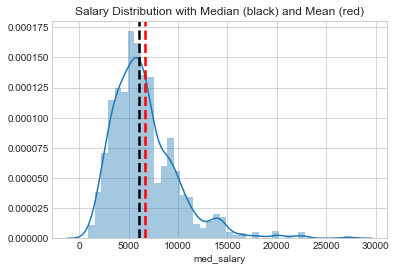

In [20]:
ax = sns.distplot(listings["med_salary"])
ax.axvline(listings["med_salary"].median(), lw=2.5, ls='dashed', color='black')
ax.axvline(listings["med_salary"].mean(), lw=2.5, ls='dashed', color='red')
ax.set_title('Salary Distribution with Median (black) and Mean (red)')

In [21]:
#We'll only be training our model on jobs that have salary data, so separate out salary jobs
salary_data = listings[listings.above_med_sal.notnull()]
# salary_data = listings[listings['above_med_sal'] == 1.0]
salary_data.columns

Index([u'url', u'title', u'company', u'responsibilities', u'requirements',
       u'min_salary', u'max_salary', u'cat', u'label', u'med_salary', u'text',
       u'above_med_sal'],
      dtype='object')

In [22]:
salary_data.shape

(1480, 12)

In [23]:
# sal_data = salary_data.sample(frac=0.)

In [24]:
#splitting out our predictor variables from the salary data
# sal_X = salary_data.iloc[:,0:len(salary_data.columns)-1]****
sal_X = salary_data[['url', 'title', 'company', 'responsibilities','requirements', 'cat', 'label', 'med_salary', 'text']]
#sal_y will be above_med_sal, creating as a dataframe
sal_y = pd.DataFrame(salary_data["above_med_sal"])

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sal_X, sal_y, test_size=0.2, stratify=sal_y, random_state=74)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [26]:
#initializing count vectorizer to examine text-based data for logistic regression. 
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',ngram_range=(1, 3), min_df = .05)

In [27]:
#fitting count vectorizer to job title
cvec.fit(X_train["title"])
#transforming job_title data into job_train
job_train = pd.DataFrame(cvec.transform(X_train["title"]).todense(),
                       columns=cvec.get_feature_names())

In [28]:
#initializing count vectorizer to examine text-based data for logistic regression. 
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',ngram_range=(1, 3), min_df = .05)

In [29]:
word_observe = pd.concat([job_train, y_train], axis=1)
word_observe.head()


,analyst,business,data,developer,digital,engineer,java,java developer,manager,senior,technology,above_med_sal
0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,0,0.0
2,1,0,1,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,1,0,0,0,0,0,0,1.0
4,0,0,0,0,0,0,0,0,0,0,0,1.0


In [30]:
#Observing most common job title n-grams for both above and below median salaries
for i in xrange(2):
    word_count = word_observe[word_observe["above_med_sal"]==i].sum(axis=0)
    print i, "most common words"
    cw = word_count.sort_values(ascending = False).head(20)
    print cw
    print

0 most common words
engineer          128.0
developer         122.0
analyst            90.0
java               78.0
data               77.0
digital            75.0
senior             70.0
manager            56.0
java developer     49.0
technology         47.0
business           46.0
above_med_sal       0.0
dtype: float64

1 most common words
above_med_sal     550.0
manager           134.0
senior            124.0
technology         91.0
developer          88.0
engineer           82.0
data               82.0
java               75.0
digital            62.0
analyst            49.0
java developer     39.0
business           35.0
dtype: float64



In [31]:
#creating separate lists of the top appearing words so that these can be combined and compared to create ratios of appearances in above-median vs. below-median salaries
word_count_below = word_observe[word_observe["above_med_sal"]==0].sum(axis=0)
word_count_above = word_observe[word_observe["above_med_sal"]==1].sum(axis=0)

In [32]:
#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T
#creating a "ratio" column to determine frequency of words associated with above median jobs vs. below median jobs
word_count_compare["above_below_ratio"] = word_count_compare[1]/word_count_compare[0]
word_count_compare.above_below_ratio.sort_values(ascending=False)

above_med_sal          inf
manager           2.392857
technology        1.936170
senior            1.771429
data              1.064935
java              0.961538
digital           0.826667
java developer    0.795918
business          0.760870
developer         0.721311
engineer          0.640625
analyst           0.544444
Name: above_below_ratio, dtype: float64

In [33]:
#Creating eight binary variables utilizing insights above to prepare data for logistic regression
#splitting out our predictor variables from the salary data
sal_X = salary_data[["title", "company", "responsibilities", "requirements", "cat", "label", "text"]]
#sal_X = salary_data[['url', 'title', 'company', 'responsibilities','requirements', 'cat', 'label', 'med_salary', 'text']]
sal_X.reset_index(drop=True, inplace=True)

In [34]:
#sal_y will be above_med_sal, creating as a dataframe, then converting to a 1-D array to allow for easier use below with k-folds, etc.
sal_y = pd.DataFrame(salary_data["above_med_sal"])
sal_y = pd.DataFrame.as_matrix(sal_y).ravel()

In [35]:
#Creating variable for if job title includes "data scientist", combinations of "machine", "learning", "engineer", and "data"
sal_X["good_job_title"] = 0
sal_X.ix[(sal_X["title"].str.contains("data scientist") | 
            sal_X["title"].str.contains("machine") | 
            sal_X["title"].str.contains("learning") |
            sal_X["title"].str.contains("engineer") |
            sal_X["title"].str.contains("data")), "good_job_title"] = 1

In [36]:
#job_title terms like "research", "analyst" "associate" are all associated with below median income
sal_X["bad_job_title"] = 0
sal_X.ix[(sal_X["title"].str.contains("research") | 
            sal_X["title"].str.contains("analyst") | 
            sal_X["title"].str.contains("associate")), "bad_job_title"] = 1

In [37]:
#job text terms including "machine learning", "machine", "learning", "data scientist", "data science", "senior", "lead", "big data", "analytics", "years" (presumably looking for at least so many years) are all associated with above median salaries
sal_X["good_summary"] = 0
sal_X.ix[(sal_X["text"].str.contains("machine") | 
            sal_X["text"].str.contains("learning") | 
            sal_X["text"].str.contains("data scien") |
            sal_X["text"].str.contains("senior") |
            sal_X["text"].str.contains("lead") |
            sal_X["text"].str.contains("big data") |         
            sal_X["text"].str.contains("analytics") |
            sal_X["text"].str.contains("years")), "good_summary"] = 1

In [38]:
# "research", "analyze" and "analysis" are all associated with below median salaries
sal_X["bad_summary"] = 0
sal_X.ix[(sal_X["text"].str.contains("research") | 
            sal_X["text"].str.contains("analyze") | 
            sal_X["text"].str.contains("analysis")), "bad_summary"] = 1

In [39]:
#dropping original data columns from sal_X to make analysis easier.
sal_X.drop(["title", "company", "responsibilities", "requirements", "cat", "label", "text"], axis=1, inplace=True)

In [40]:
#converting 1 and 0 values in matrix to float
sal_X = sal_X.astype("float")
sal_X.head()

,good_job_title,bad_job_title,good_summary,bad_summary
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0


Text(0.5,1,u'Correlation Heatmap of 4 Binary Variables for Predicting Job Salary')

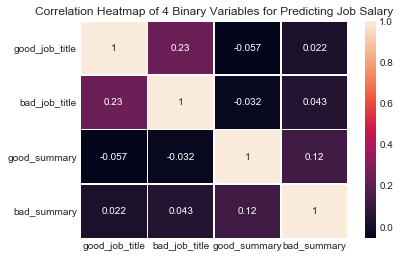

In [41]:
#perform Pearson correlation coefficients using NumPy and Seaborn
feature_correlation_matrix = sal_X.corr()

#creating heatmap correlation matrix of predictor coefficients.
sns.heatmap(feature_correlation_matrix,
           annot = True,
           linewidths = 0.5)
plt.title('Correlation Heatmap of 4 Binary Variables for Predicting Job Salary')


In [42]:
X_train, X_test, y_train, y_test = train_test_split(sal_X, sal_y, test_size=0.2, stratify=sal_y, random_state=74)

In [43]:
#now score a logistic regression on X_train and y_train using cross_val_scores
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print "Score:", logreg.score(X_train, y_train)     
scores = cross_val_score(logreg, X_train, y_train, cv=6)
print "Cross-validated scores:", scores


Score: 0.5650337837837838
Cross-validated scores: [0.56060606 0.54040404 0.55555556 0.5959596  0.55102041 0.58163265]


In [44]:
#predicting salaries in X_test given predictors developed with X_train
y_probs = logreg.predict(X_test)   

#generates predicted values of Y_test from X_test based off of training set.
print "Score:", logreg.score(X_test, y_test)

#create classification and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#printing confusion matrix 
print(confusion_matrix(y_test, y_probs,))

#printing classification report
target_names = ['below_med', 'above_med']
print(classification_report(y_test, y_probs, target_names=target_names))

Score: 0.5608108108108109
[[105  54]
 [ 76  61]]
             precision    recall  f1-score   support

  below_med       0.58      0.66      0.62       159
  above_med       0.53      0.45      0.48       137

avg / total       0.56      0.56      0.56       296



In [45]:
#predicting salaries in X_test given predictors developed with X_train
y_probs = logreg.predict(X_test)   

#generates predicted values of Y_test from X_test based off of training set.
print "Score:", logreg.score(X_test, y_test)

Score: 0.5608108108108109


In [46]:
#Create classification and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#printing confusion matrix 
print(confusion_matrix(y_test, y_probs,))

#printing classification report
target_names = ['below_med', 'above_med']
print(classification_report(y_test, y_probs, target_names=target_names))

[[105  54]
 [ 76  61]]
             precision    recall  f1-score   support

  below_med       0.58      0.66      0.62       159
  above_med       0.53      0.45      0.48       137

avg / total       0.56      0.56      0.56       296



In [48]:
# listings.sort_values(by = 'med_salary', ascending = True)

In [49]:
# listings.sort_values(by = 'med_salary', ascending = False)

In [ ]:
# dummy_cat

In [ ]:
# dummy_company

In [ ]:
# listings.company.unique()

### Question 2

In [55]:
from collections import Counter

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
dummy_cat = pd.get_dummies(listings['cat'], prefix='cat', drop_first=True)
dummy_company = pd.get_dummies(listings['company'], prefix='company', drop_first=True)


In [51]:
listings.columns

Index([u'url', u'title', u'company', u'responsibilities', u'requirements',
       u'min_salary', u'max_salary', u'cat', u'label', u'med_salary', u'text',
       u'above_med_sal'],
      dtype='object')

In [52]:
print listings.shape
print listings.info()
# listings.reset_index(drop=True,inplace=True)
listings.head()

(1480, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 12 columns):
url                 1480 non-null object
title               1480 non-null object
company             1480 non-null object
responsibilities    1480 non-null object
requirements        1480 non-null object
min_salary          1480 non-null float64
max_salary          1480 non-null float64
cat                 1480 non-null object
label               1480 non-null int64
med_salary          1480 non-null float64
text                1480 non-null object
above_med_sal       1480 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 138.8+ KB
None


,url,title,company,responsibilities,requirements,min_salary,max_salary,cat,label,med_salary,text,above_med_sal
0,https://www.mycareersfuture.sg/job/2d8dd9bde21...,"Senior Manager, Data Scientist",SINGAPORE TELECOMMUNICATIONS LIMITED,Technology Group The Technology Group (TG) is ...,Requirements Master’s degree or PhD in techni...,5500.0,11000.0,data_science,1,8250.0,"Senior Manager, Data Scientist SINGAPORE TELEC...",1.0
1,https://www.mycareersfuture.sg/job/9251f72bf1e...,Data Scientist,SINGAPORE TELECOMMUNICATIONS LIMITED,Responsibilities: Develop and enhance data i...,Requirements: Minimum B.S. degree in Compute...,4500.0,9000.0,data_science,1,6750.0,Data Scientist SINGAPORE TELECOMMUNICATIONS LI...,1.0
2,https://www.mycareersfuture.sg/job/f5d8acc78b2...,Data Scientist,NIOMETRICS (PTE.) LTD.,Your profile & role on the project YOU: Thriv...,"You hold a Bachelor, Master or PhD degree in...",5000.0,10000.0,data_science,1,7500.0,Data Scientist NIOMETRICS (PTE.) LTD. Your pro...,1.0
3,https://www.mycareersfuture.sg/job/557127dc1c2...,Data Scientist Junior,AXA DIL@ASIA PTE. LTD.,If you are an experienced and passionate Dat...,Job Summary: If you are an experienced and pas...,4600.0,5600.0,data_science,1,5100.0,Data Scientist Junior AXA DIL@ASIA PTE. LTD. ...,0.0
4,https://www.mycareersfuture.sg/job/e83b986ed40...,Data Scientist,ACCENTURE PTE LTD,Singtel Group Consumer is seeking a Senior Dat...,Requirements: Minimum Masters degree and abov...,6000.0,12000.0,data_science,1,9000.0,Data Scientist ACCENTURE PTE LTD Singtel Group...,1.0
